# Declaration of Originality

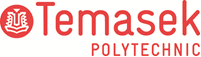

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Jerrica Low Yuin En (2404802G)
* Tutorial Group                : T07
* Tutor						    : Ms Ester
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Train/test + tuning
from sklearn.model_selection import train_test_split

# Models (regression)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Business Understanding
Goal: The goal of this project is to develop a machine learning model that can be predict the price of a car based on its features such as the specification, usage and other relevant attributes.

Accurately predicting the car prices can help sellers to set the competitive prices and assist buyers in making an informed purcharshing decisions. This problem is formulated as a regression task, as the target variable is a continours numerical value that represent the car price.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read data
FILE_PATH= "car_price_prediction.csv"
df = pd.read_csv(FILE_PATH)

df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,26556126,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000 km,8,Automatic,Rear,4-May,Left wheel,Silver,0
1,20746880,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000 km,4,Automatic,Rear,4-May,Left wheel,White,0
2,41720592,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000 km,4,Manual,Rear,4-May,Left wheel,White,0
3,32171534,119172,-,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000 km,4,Automatic,Rear,4-May,Left wheel,White,0
4,38169002,150,-,BMW,340,1947,Limousine,No,Petrol,2,165000 km,6,Manual,Rear,4-May,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45809552,93079,1866,CHEVROLET,Colorado,2020,Pickup,Yes,Petrol,3.6,3510 km,4,Automatic,Front,4-May,Left wheel,Grey,4
19233,45813168,300,-,MERCEDES-BENZ,Sprinter,2020,Microbus,No,Petrol,0.1,0 km,1,Manual,Rear,4-May,Left wheel,Beige,0
19234,45765358,31675,1817,TOYOTA,Tacoma,2020,Sedan,Yes,Petrol,3.5,1669 km,6,Automatic,4x4,4-May,Left wheel,Black,12
19235,45732079,88438,1076,HYUNDAI,Santa FE,2020,Jeep,Yes,Petrol,2,12334 km,4,Automatic,Front,4-May,Left wheel,Blue,4


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  object
 11  Cylinders         19237 non-null  int64 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [4]:
## Check for missing data
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [5]:
## Describe data distribution
df.describe(include='all')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,1.923700e+04,1.923700e+04,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000,19237,19237,19237,19237,19237,19237.000000
unique,NaN,NaN,559,65,1590,NaN,11,2,7,107,7687,NaN,4,3,3,2,16,NaN
top,NaN,NaN,-,HYUNDAI,Prius,NaN,Sedan,Yes,Petrol,2,0 km,NaN,Automatic,Front,4-May,Left wheel,Black,NaN
freq,NaN,NaN,5819,3769,1083,NaN,8736,13954,10150,3916,721,NaN,13514,12874,18332,17753,5033,NaN
mean,4.557654e+07,1.855593e+04,NaN,NaN,NaN,2010.912824,NaN,NaN,NaN,NaN,NaN,4.582991,NaN,NaN,NaN,NaN,NaN,6.582627
std,9.365914e+05,1.905813e+05,NaN,NaN,NaN,5.668673,NaN,NaN,NaN,NaN,NaN,1.199933,NaN,NaN,NaN,NaN,NaN,4.320168
min,2.074688e+07,1.000000e+00,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4.569837e+07,5.331000e+03,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,4.577231e+07,1.317200e+04,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,6.000000
75%,4.580204e+07,2.207500e+04,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,12.000000


- the df.info() output shows that all the columns are numerical and that there isn't any categorical variables. Which is important as numerical features can be directly used by the machine learning algorithms without having additional encoding.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

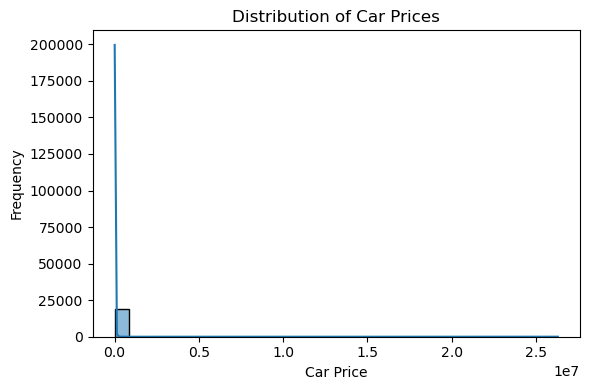

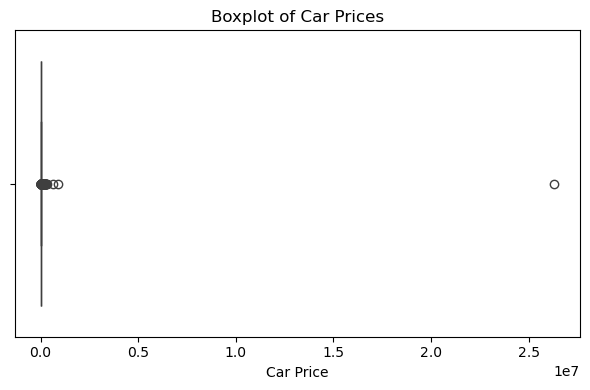

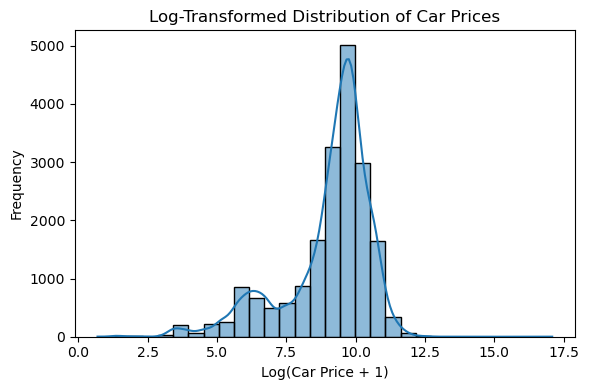

In [6]:
## Understanding distribution of target
col_y = "Price"  

# Summary statistics of target variable
df[col_y].describe()

# Histogram of target variable
plt.figure(figsize=(6, 4))
sns.histplot(df[col_y], bins=30, kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[col_y])
plt.title("Boxplot of Car Prices")
plt.xlabel("Car Price")
plt.tight_layout()
plt.show()

# Log-transformed target distribution - histogram
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(df[col_y]), bins=30, kde=True)
plt.title("Log-Transformed Distribution of Car Prices")
plt.xlabel("Log(Car Price + 1)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [7]:
#explain the histogram distribution , the boxplot can help to identify what outliers and why it is important 

### 2.3.1.2 Understanding distribution of features

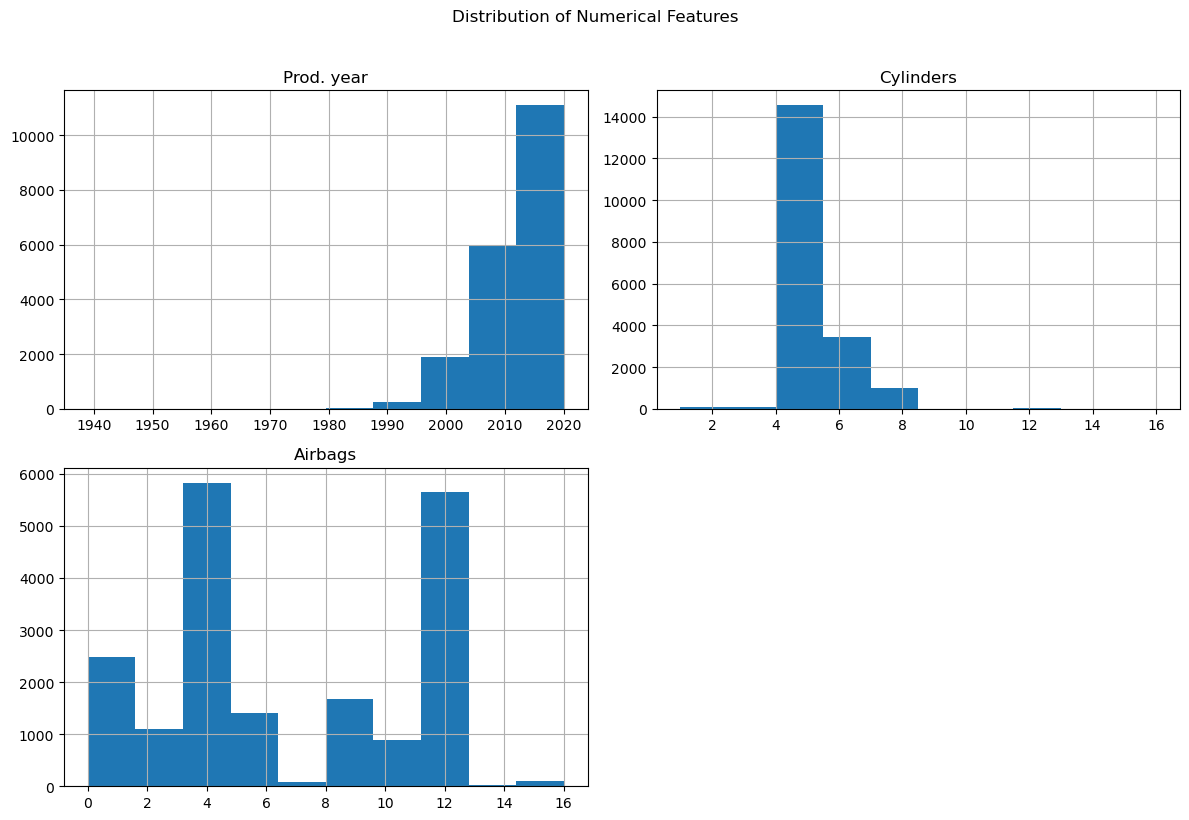

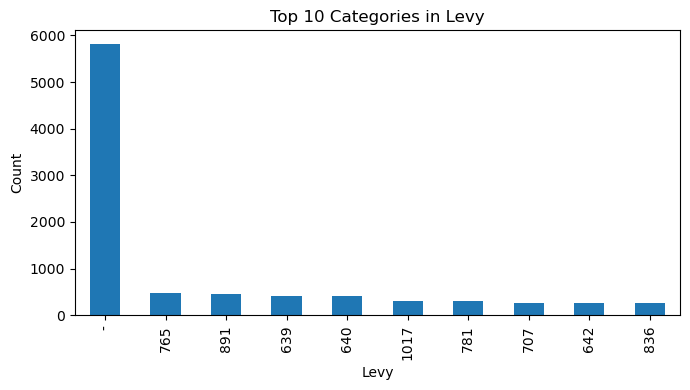

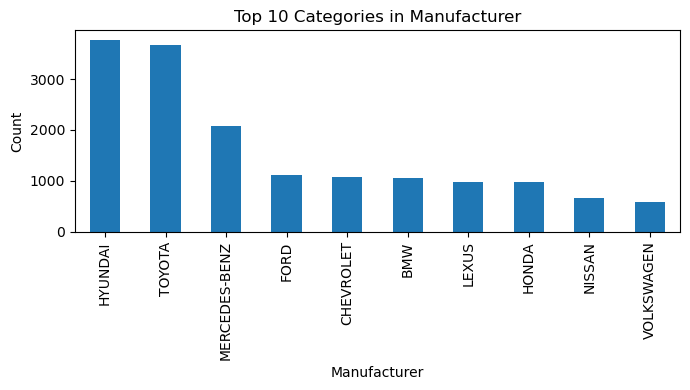

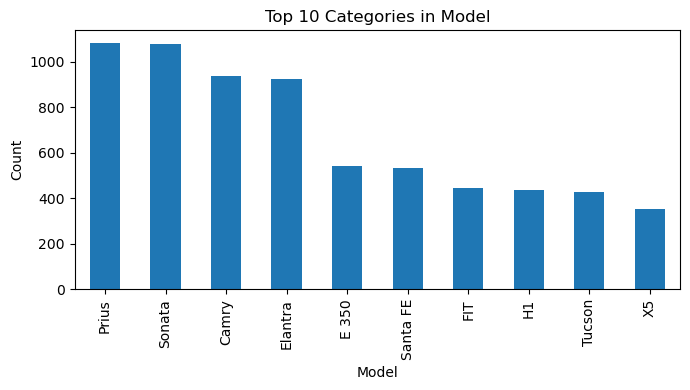

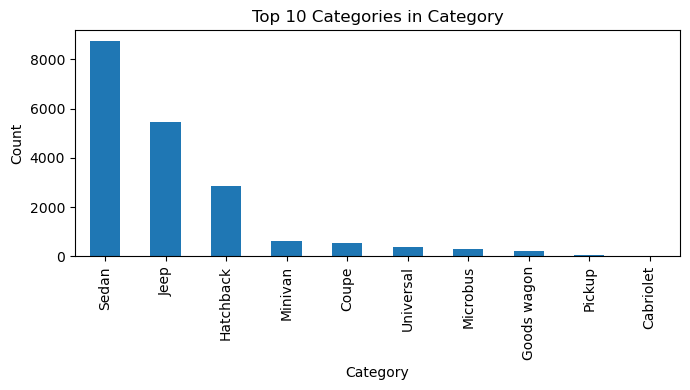

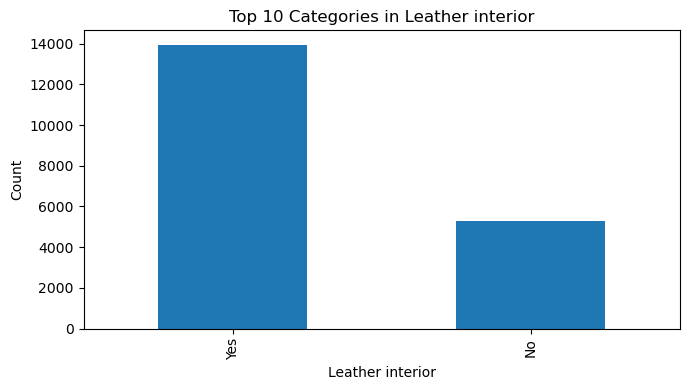

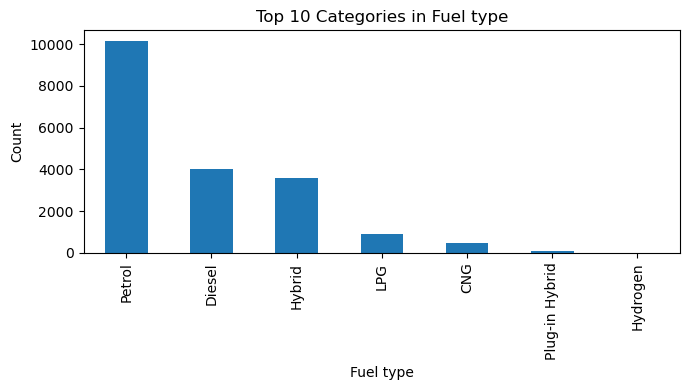

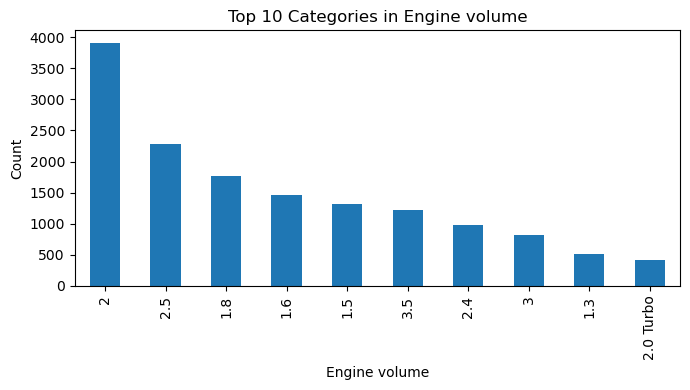

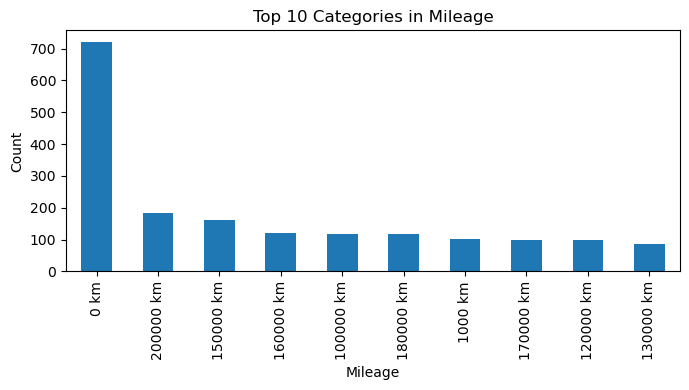

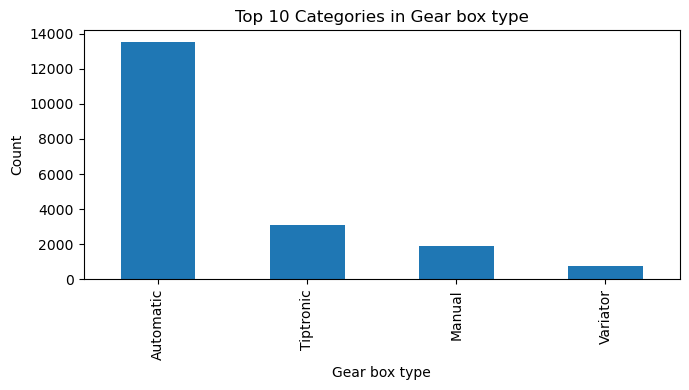

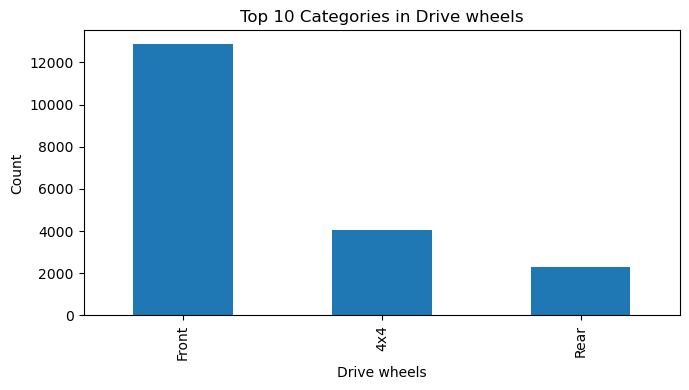

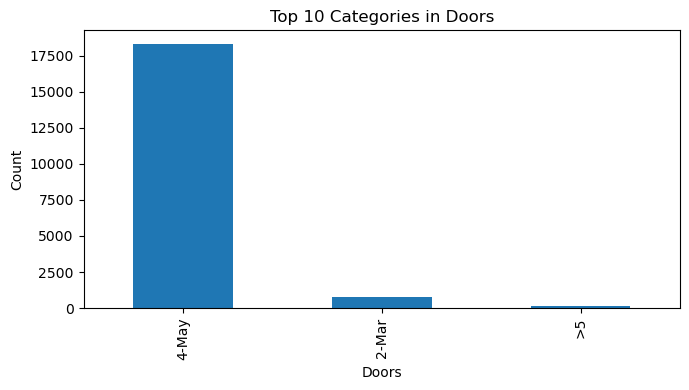

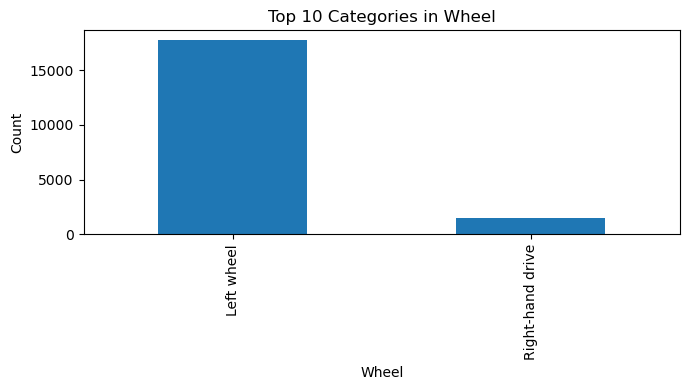

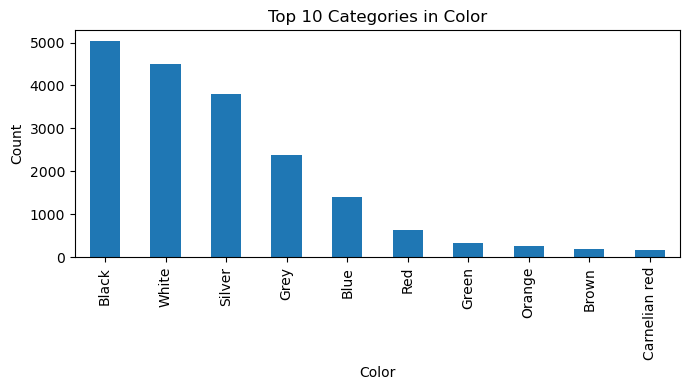

In [8]:
# Remove ID column (identifier only)
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# Numerical features distribution

# Select numerical features and exclude target variable
num_features = df.select_dtypes(include=["int64", "float64"]).columns
num_features = num_features.drop(col_y)

# Plot histograms for numerical features
df[num_features].hist(figsize=(12, 8))
plt.suptitle("Distribution of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


# Categorical features distribution
cat_features = df.select_dtypes(include=["object", "category"]).columns

# Plot top 10 categories for each categorical feature
for col in cat_features:
    plt.figure(figsize=(7, 4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 Categories in {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


### 2.3.2 Understanding relationship between variables

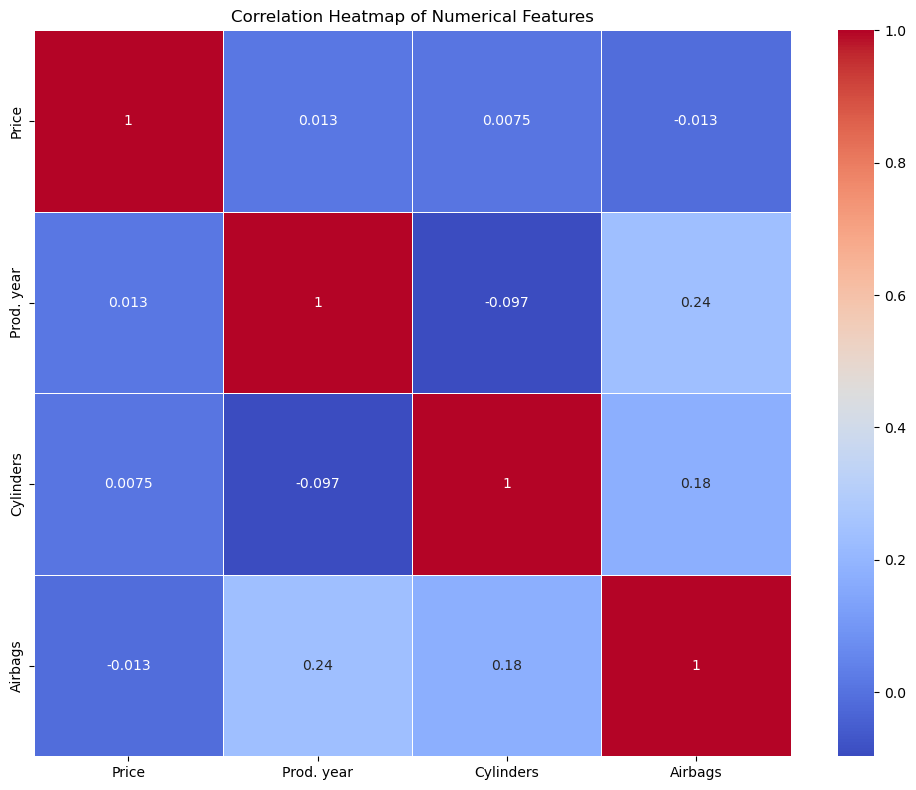

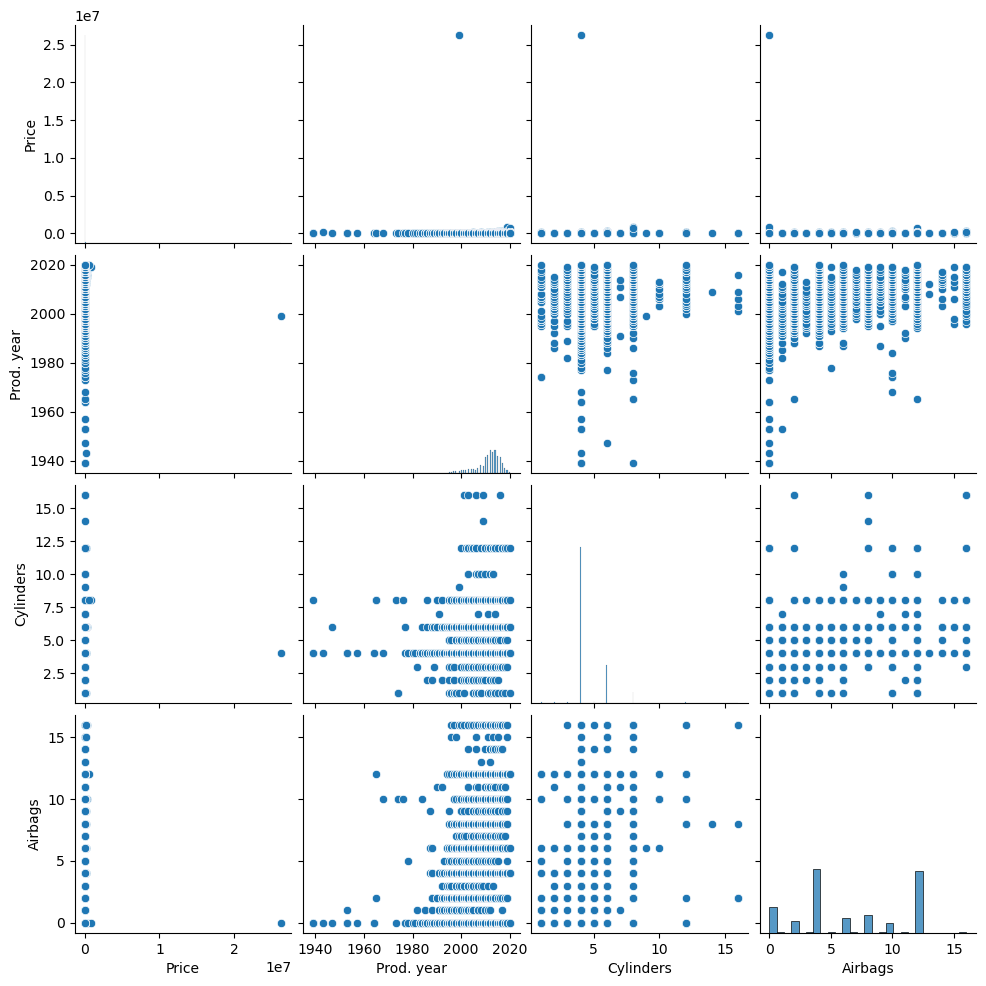

In [9]:
## Understanding relationship between variables

# Select numerical columns only
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Pairplot for selected important numerical features
selected_features = [col_y] + list(
    df.select_dtypes(include=["int64", "float64"]).columns
    .drop(col_y)
    .sort_values()[:3]   # take a few numerical features only
)

sns.pairplot(df[num_cols])
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [10]:
## Data preprocessing - drop unnecessary columns
print("Initial dataset shape")
print(df.shape)

print("\nData types")
print(df.dtypes)

# Drop columns not required for modelling
drop_cols = ["ID", "Manufacturer", "Model", "Color"]
drop_exist = [c for c in drop_cols if c in df.columns]
df = df.drop(columns=drop_exist)

print("\nDropped columns")
print(drop_exist)

print("\nRemaining columns")
print(df.columns.tolist())

print("\nDataset shape after dropping columns")
print(df.shape)


Initial dataset shape
(19237, 17)

Data types
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

Dropped columns
['Manufacturer', 'Model', 'Color']

Remaining columns
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags']

Dataset shape after dropping columns
(19237, 14)


Missing values in Price
0
Rows dropped due to missing Price
0
Price statistics before outlier handling
count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64


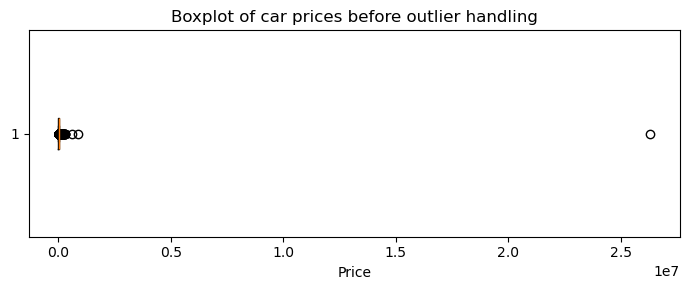

Outlier capping limits for Price
Lower cap
-11413.0
Upper cap
38819.0
Price statistics after outlier handling
count    19237.000000
mean     15234.153818
std      12061.520819
min          1.000000
25%       5331.000000
50%      13172.000000
75%      22075.000000
max      38819.000000
Name: Price_clean, dtype: float64


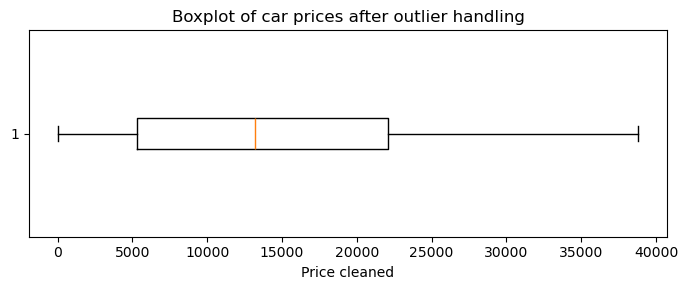

Levy cleaned and filled with median
count    19237.000000
mean       868.773353
std        390.040440
min         87.000000
25%        730.000000
50%        781.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64
Rows removed with production year before 1990
69


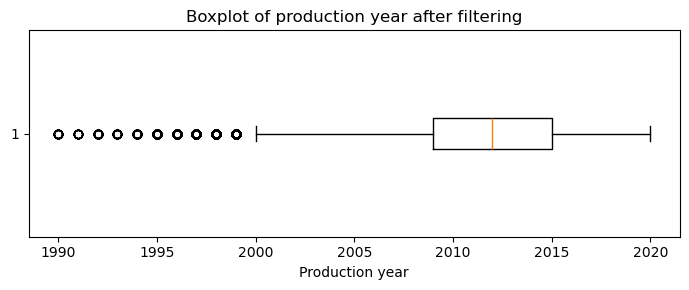

Missing values after numeric cleaning
Price               0
Levy                0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Airbags             0
Price_clean         0
dtype: int64


In [11]:
def clean_numeric_col(series):
    s = series.astype(str).str.replace(",", "", regex=False).str.strip()
    s = s.replace(["-", "nan", "None", ""], np.nan)
    return pd.to_numeric(s, errors="coerce")


def boxplot_series(series, title, xlabel):
    plt.figure(figsize=(7, 3))
    plt.boxplot(series.dropna(), vert=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()


def cap_outliers_iqr(series, k):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    low = q1 - k * iqr
    high = q3 + k * iqr

    capped = series.clip(lower=low, upper=high)
    return capped, low, high


# Ensure Price is numeric
df["Price"] = clean_numeric_col(df["Price"])

print("Missing values in Price")
print(df["Price"].isna().sum())

before = len(df)
df = df.dropna(subset=["Price"])
print("Rows dropped due to missing Price")
print(before - len(df))

print("Price statistics before outlier handling")
print(df["Price"].describe())

boxplot_series(df["Price"], "Boxplot of car prices before outlier handling", "Price")

# Handle outliers using IQR capping
k = 1.0
df["Price_clean"], low, high = cap_outliers_iqr(df["Price"], k)

print("Outlier capping limits for Price")
print("Lower cap")
print(low)
print("Upper cap")
print(high)

print("Price statistics after outlier handling")
print(df["Price_clean"].describe())

boxplot_series(df["Price_clean"], "Boxplot of car prices after outlier handling", "Price cleaned")

# Levy cleaning
df["Levy"] = clean_numeric_col(df["Levy"])
df["Levy"] = df["Levy"].fillna(df["Levy"].median())

print("Levy cleaned and filled with median")
print(df["Levy"].describe())

# Production year cleaning
df["Prod. year"] = pd.to_numeric(df["Prod. year"], errors="coerce")
df["Prod. year"] = df["Prod. year"].fillna(df["Prod. year"].median())

before = len(df)
df = df[df["Prod. year"] >= 1990]
print("Rows removed with production year before 1990")
print(before - len(df))

boxplot_series(df["Prod. year"], "Boxplot of production year after filtering", "Production year")

# Engine volume cleaning
ev = df["Engine volume"].astype(str).str.lower()
ev = ev.str.replace("turbo", "", regex=False)
ev = ev.str.extract(r"([\d\.]+)")
df["Engine volume"] = pd.to_numeric(ev[0], errors="coerce")
df["Engine volume"] = df["Engine volume"].fillna(df["Engine volume"].median())

# Mileage cleaning
m = df["Mileage"].astype(str).str.lower()
m = m.str.replace("km", "", regex=False).str.replace(",", "", regex=False).str.strip()
m = m.replace(["-", "nan", "None", ""], np.nan)
df["Mileage"] = pd.to_numeric(m, errors="coerce")
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

# Cylinders and Airbags
df["Cylinders"] = pd.to_numeric(df["Cylinders"], errors="coerce")
df["Cylinders"] = df["Cylinders"].fillna(df["Cylinders"].median())

df["Airbags"] = pd.to_numeric(df["Airbags"], errors="coerce")
df["Airbags"] = df["Airbags"].fillna(df["Airbags"].median())

print("Missing values after numeric cleaning")
print(df.isna().sum())


Categorical columns
['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel']
Unique values per categorical column
Category 11
Leather interior 2
Fuel type 7
Gear box type 4
Drive wheels 3
Doors 3
Wheel 2
Top values per categorical column
Category
Category
Sedan        8705
Jeep         5459
Hatchback    2843
Minivan       646
Coupe         527
Name: count, dtype: int64

Leather interior
Leather interior
Yes    13940
No      5228
Name: count, dtype: int64

Fuel type
Fuel type
Petrol    10094
Diesel     4030
Hybrid     3578
LPG         892
CNG         487
Name: count, dtype: int64

Gear box type
Gear box type
Automatic    13505
Tiptronic     3102
Manual        1815
Variator       746
Name: count, dtype: int64

Drive wheels
Drive wheels
Front    12863
4x4       4043
Rear      2262
Name: count, dtype: int64

Doors
Doors
4-May    18281
2-Mar      759
>5         128
Name: count, dtype: int64

Wheel
Wheel
Left wheel          17684
Right-hand drive     1

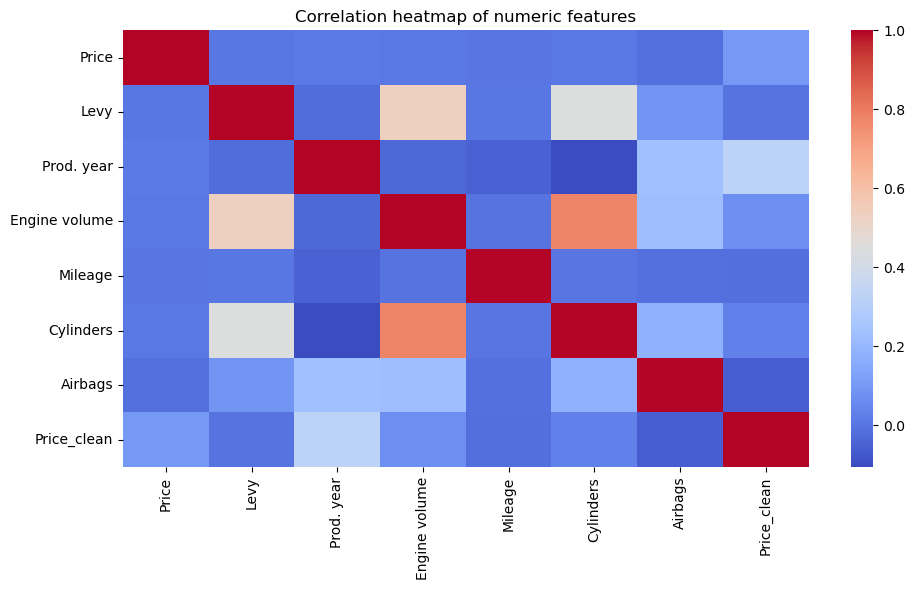

Correlation with Price_clean
Price_clean      1.000000
Prod. year       0.321713
Price            0.097194
Engine volume    0.070450
Cylinders        0.028216
Levy            -0.002803
Mileage         -0.018066
Airbags         -0.061589
Name: Price_clean, dtype: float64


In [12]:
# Identify categorical columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Categorical columns")
print(cat_cols)

print("Unique values per categorical column")
for c in cat_cols:
    print(c, df[c].nunique())

print("Top values per categorical column")
for c in cat_cols:
    print(c)
    print(df[c].value_counts().head())
    print()


# Correlation analysis (numeric only)
num_df = df.select_dtypes(include=["number"]).copy()

plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation heatmap of numeric features")
plt.tight_layout()
plt.show()

# Correlation with target (no log)
target = "Price_clean"

if target in num_df.columns:
    print("Correlation with " + target)
    print(num_df.corr()[target].sort_values(ascending=False))
else:
    print("Target column not found")
    print("Available numeric columns")
    print(num_df.columns.tolist())


In [13]:
# Category integer encoding
cats = sorted(df["Category"].dropna().astype(str).unique())
cat_map = {v: i for i, v in enumerate(cats)}
df["Category_encoded"] = df["Category"].astype(str).map(cat_map)

# Leather binary
leather = df["Leather interior"].astype(str).str.lower().str.strip()
df["Leather_binary"] = leather.map({"yes": 1, "no": 0})
df["Leather_binary"] = df["Leather_binary"].fillna(0).astype(int)

# Wheel binary
wheel = df["Wheel"].astype(str).str.lower().str.strip()
df["Wheel_binary"] = np.where(wheel.str.contains("left", na=False), 0, np.nan)
df["Wheel_binary"] = np.where(wheel.str.contains("right", na=False), 1, df["Wheel_binary"])
df["Wheel_binary"] = df["Wheel_binary"].fillna(df["Wheel_binary"].mode().iloc[0]).astype(int)

# Drive wheels standardisation
dw = df["Drive wheels"].astype(str).str.lower().str.strip()
df["Drive wheels"] = dw.replace({
    "front": "fwd",
    "rear": "rwd",
    "4x4": "awd",
    "4wd": "awd"
})

# Doors grouping
d = df["Doors"].astype(str).str.extract(r"(\d+)")
df["Doors"] = pd.to_numeric(d[0], errors="coerce")

if df["Doors"].notna().any():
    df["Doors"] = df["Doors"].fillna(df["Doors"].mode().iloc[0])
else:
    df["Doors"] = df["Doors"].fillna(4)

df["Doors_group"] = np.where(df["Doors"] <= 4, "le_4", "gt_4")

before = len(df)
df = df.drop_duplicates()
print("Duplicate rows removed")
print(before - len(df))


Duplicate rows removed
3551


In [14]:
print("Columns and data types in df before feature selection")
print(df.dtypes)
print("Columns list")
print(df.columns.tolist())

# Target (Option A no log)
y = df["Price_clean"].copy()

# Columns to drop from modelling
drop_cols = [
    "Price",
    "Price_clean",
    "Price_log",
    "Category",
    "Leather interior",
    "Wheel",
    "Doors"
]

print("Columns planned to be dropped from X")
print(drop_cols)

# Build feature matrix
X = df.drop(columns=drop_cols, errors="ignore").copy()

# Remove ID from modelling if present
if "ID" in X.columns:
    X = X.drop(columns=["ID"], errors="ignore")
    print("ID column removed from X")

print("Columns and data types in X before one hot encoding")
print(X.dtypes)

print("Columns remaining in X before one hot encoding")
print(X.columns.tolist())

# One hot encode remaining categorical columns
X = pd.get_dummies(X, drop_first=True)

# Convert bool to int (optional but cleaner for some models)
for c in X.columns:
    if X[c].dtype == bool:
        X[c] = X[c].astype(int)

# Fill missing values
X = X.fillna(0)

print("Columns and data types in X after one hot encoding")
print(X.dtypes)

print("Columns used for modelling after encoding")
print(X.columns.tolist())

print("Final feature matrix shape")
print(X.shape)

print("Target shape")
print(y.shape)

print("Count of data types in X")
print(X.dtypes.value_counts())

print("Remaining object or category columns in X")
print(X.select_dtypes(include=["object", "category"]).columns.tolist())

print("Columns used for training")
print(X.columns.tolist())

# Save if needed
X.to_csv("cleaned_X.csv", index=False)


Columns and data types in df before feature selection
Price                 int64
Levy                float64
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                object
Airbags               int64
Price_clean           int64
Category_encoded      int64
Leather_binary        int64
Wheel_binary          int64
Doors_group          object
dtype: object
Columns list
['Price', 'Levy', 'Prod. year', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Airbags', 'Price_clean', 'Category_encoded', 'Leather_binary', 'Wheel_binary', 'Doors_group']
Columns planned to be dropped from X
['Price', 'Price_clean', 'Price_log', 'Category', 'Leather interior', 'Wheel', 'Doors'

## 3.2 Train-Test Split

In [15]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (12493, 21)
X_test shape: (3124, 21)
y_train shape: (12493,)
y_test shape: (3124,)


# 4. Modelling

### 4.2 Train Model

In [ ]:
# Models
lr_model = LinearRegression()

dt_model = DecisionTreeRegressor()


rf_model = RandomForestRegressor()

# Gradient Boosting
# Do not use max_depth here
gbr_model = GradientBoostingRegressor()

# Fit
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

print("Models trained successfully")
print("Linear Regression")
print("Decision Tree")
print("Random Forest")
print("Gradient Boosting")


Models trained successfully
Linear Regression
Decision Tree
Random Forest
Gradient Boosting


In [17]:
# Train Linear Regression model
lr_model.fit(X_train, y_train)

# Train Decision Tree Regressor
dt_model.fit(X_train, y_train)

# Train Random Forest Regressor
rf_model.fit(X_train, y_train)

# Train Gradient Boosting Regressor
gbr_model.fit(X_train, y_train)

print("Models trained successfully:")
print("- Linear Regression")
print("- Decision Tree Regressor")
print("- Random Forest Regressor")
print("- Gradient Boosting Regressor")

Models trained successfully:
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor


# 5. Model Evaluation

Model Evaluation sorted by R2
                         Model          MAE         RMSE        R2
2      Random Forest Regressor  4181.459785  6369.740596  0.706083
3  Gradient Boosting Regressor  5297.816389  7212.092233  0.623206
1      Decision Tree Regressor  5251.396073  8464.987353  0.480920
0            Linear Regression  7351.529331  9244.889572  0.380865


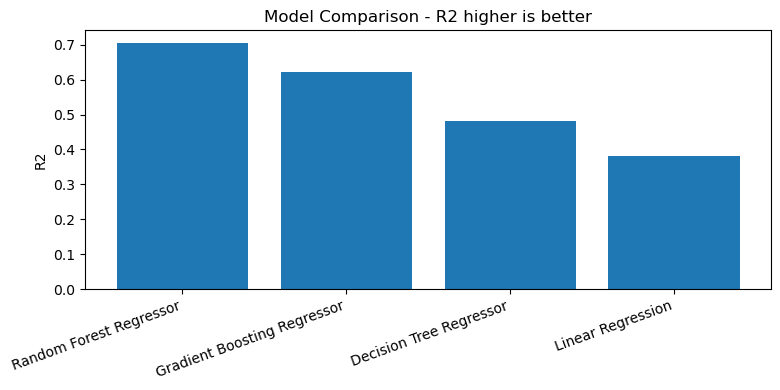

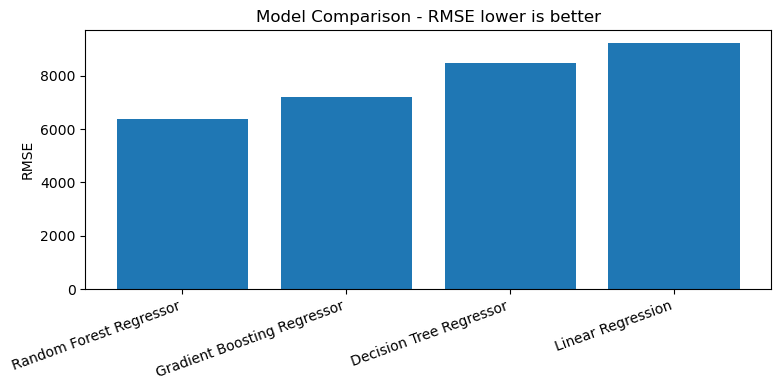

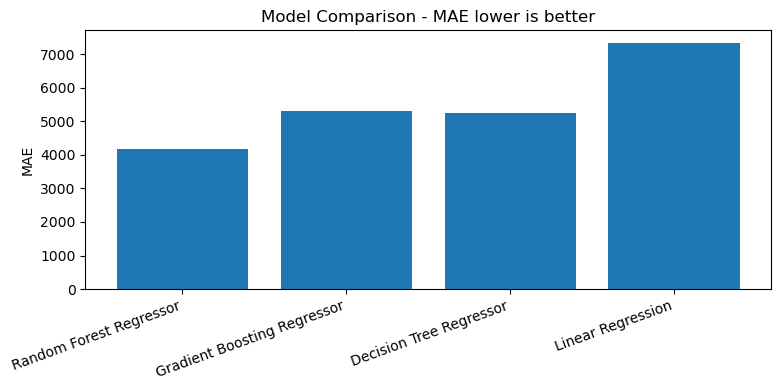

Best model based on highest R2
Random Forest Regressor


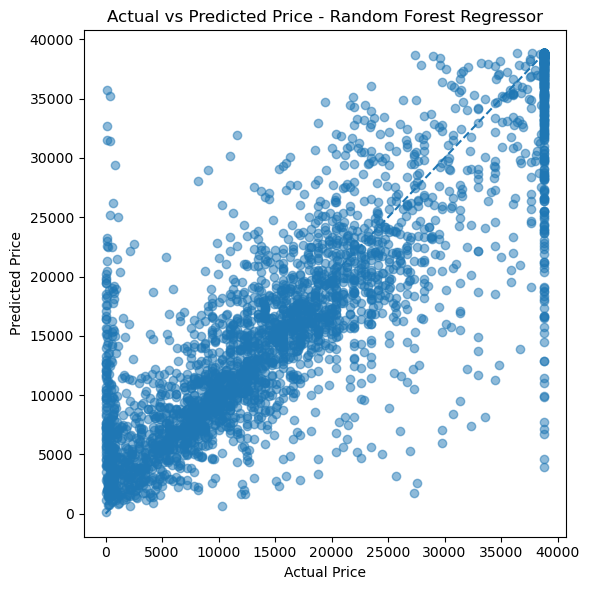

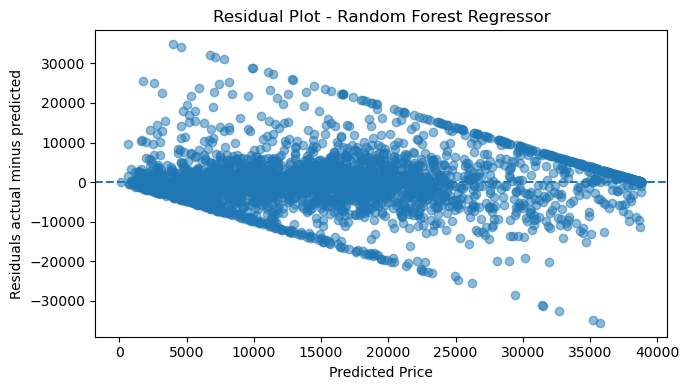

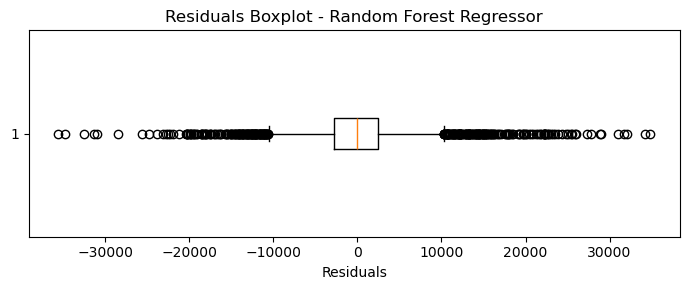

In [18]:
def eval_reg(model, X_te, y_te):
    pred = model.predict(X_te)
    mae = mean_absolute_error(y_te, pred)
    rmse = np.sqrt(mean_squared_error(y_te, pred))
    r2 = r2_score(y_te, pred)
    return pred, mae, rmse, r2


models = {
    "Linear Regression": lr_model,
    "Decision Tree Regressor": dt_model,
    "Random Forest Regressor": rf_model,
    "Gradient Boosting Regressor": gbr_model
}

results = []
preds = {}

for name, m in models.items():
    pred, mae, rmse, r2 = eval_reg(m, X_test, y_test)
    preds[name] = pred
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2})

results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("Model Evaluation sorted by R2")
print(results_df)


# Graphs compare models
plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["R2"])
plt.title("Model Comparison - R2 higher is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("R2")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("Model Comparison - RMSE lower is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(results_df["Model"], results_df["MAE"])
plt.title("Model Comparison - MAE lower is better")
plt.xticks(rotation=20, ha="right")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()


# Best model diagnostics
best_name = results_df.iloc[0]["Model"]
best_pred = preds[best_name]
print("Best model based on highest R2")
print(best_name)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="--")
plt.title("Actual vs Predicted Price - " + best_name)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.tight_layout()
plt.show()

residuals = y_test - best_pred

plt.figure(figsize=(7, 4))
plt.scatter(best_pred, residuals, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.title("Residual Plot - " + best_name)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals actual minus predicted")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 3))
plt.boxplot(residuals.dropna(), vert=False)
plt.title("Residuals Boxplot - " + best_name)
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()


In [19]:
# =========================
# 5. Model Evaluation
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# -------------------------
# Evaluation function
# -------------------------
def evaluate_model(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    return {
        "Model": model_name,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (Coefficient of Determination)": r2
    }


# Evaluate all models
results = []
results.append(evaluate_model(lr_model, "Linear Regression", X_test, y_test))
results.append(evaluate_model(dt_model, "Decision Tree Regressor", X_test, y_test))
results.append(evaluate_model(rf_model, "Random Forest Regressor", X_test, y_test))
results.append(evaluate_model(gbr_model, "Gradient Boosting Regressor", X_test, y_test))

# Create results table
results_df = pd.DataFrame(results).sort_values(
    by="Root Mean Squared Error (RMSE)"
)

results_df

,Model,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-squared (Coefficient of Determination)
2,Random Forest Regressor,4181.459785,6369.740596,0.706083
3,Gradient Boosting Regressor,5297.816389,7212.092233,0.623206
1,Decision Tree Regressor,5251.396073,8464.987353,0.480920
0,Linear Regression,7351.529331,9244.889572,0.380865


In [20]:
def plot_regression_results(model, model_name, X_test, y_test):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        "r--"
    )
    plt.xlabel("Actual Log Price")
    plt.ylabel("Predicted Log Price")
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.tight_layout()
    plt.show()

    # Residual Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color="red", linestyle="--")
    plt.xlabel("Predicted Log Price")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot ({model_name})")
    plt.tight_layout()
    plt.show()


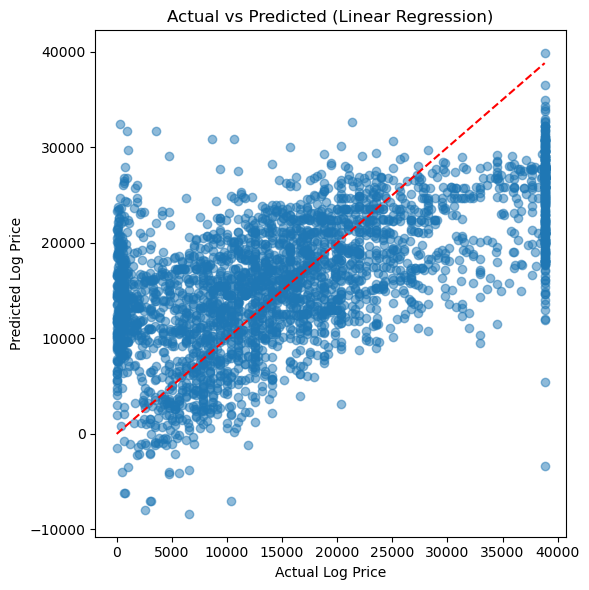

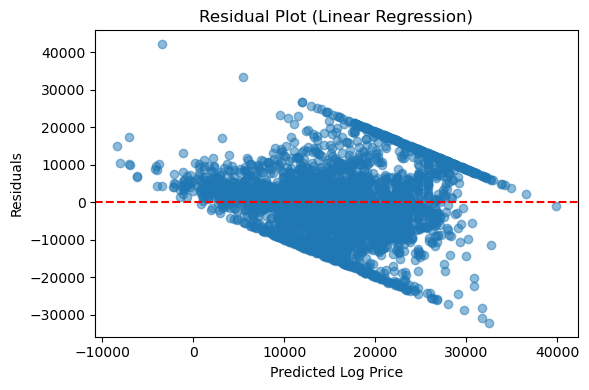

In [21]:
plot_regression_results(
    lr_model,
    "Linear Regression",
    X_test,
    y_test
)

## Iterative model development


In [22]:
feature engineering and hyperparameter tuning - max n_iter is 3 (randomsearchcv)
##ignore for reference
# =========================
# 6. Iterative Model Development
# =========================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# -------------------------
# 6.1 Train-test split (keep same split for fair comparison)
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train-test split completed.")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)


# -------------------------
# Helper: evaluate regression model
# -------------------------
def evaluate_regression(model, model_name):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)                         # Mean Absolute Error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))                # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)                                     # R-squared (Coefficient of Determination)

    return {
        "Iteration": model_name,
        "Mean Absolute Error (MAE)": mae,
        "Root Mean Squared Error (RMSE)": rmse,
        "R-squared (Coefficient of Determination)": r2
    }


results = []


# -------------------------
# Iteration 1: Baseline Linear Regression
# -------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
results.append(evaluate_regression(lr_model, "Iteration 1 - Linear Regression (Baseline)"))


# -------------------------
# Iteration 2: Decision Tree Regressor (non-linear)
# -------------------------
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
results.append(evaluate_regression(dt_model, "Iteration 2 - Decision Tree Regressor"))


# -------------------------
# Iteration 3: Random Forest Regressor (ensemble)
# -------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
results.append(evaluate_regression(rf_model, "Iteration 3 - Random Forest Regressor"))


# -------------------------
# Iteration 4: Gradient Boosting Regressor (boosting)
# -------------------------
gbr_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr_model.fit(X_train, y_train)
results.append(evaluate_regression(gbr_model, "Iteration 4 - Gradient Boosting Regressor"))


# -------------------------
# Iteration 5: Improved Random Forest (reduce overfitting / better generalisation)
# (This often improves performance with high-dimensional one-hot features)
# -------------------------
rf_improved = RandomForestRegressor(
    n_estimators=300,
    max_depth=18,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
rf_improved.fit(X_train, y_train)
results.append(evaluate_regression(rf_improved, "Iteration 5 - Random Forest (Improved Parameters)"))


# -------------------------
# Compare all iterations
# -------------------------
iterative_results_df = pd.DataFrame(results)

# Sort by RMSE (lower is better)
iterative_results_df = iterative_results_df.sort_values(by="Root Mean Squared Error (RMSE)")

iterative_results_df


SyntaxError: invalid syntax (1124559511.py, line 1)

## Streamlit

In [ ]:
import joblib

joblib.dump(rf_improved, "best_car_price_model.pkl")

['best_car_price_model.pkl']